In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [13]:
#Carga los datos
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [14]:
#Conversión a dataframe
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
#Crea la columna de Species (target)
df['Species'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
#Remplazo de números por etiquetas
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['Species'] = df['Species'].replace(targets)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
#Extraemos las características y las etiquetas
X = df.drop(columns="Species")
y = df["Species"]
#Guardamos los nombres de las características y de las etiquetas
feature_names = X.columns
labels = y.unique()
#Dividimos el dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.4,
                                                 random_state = 42)

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

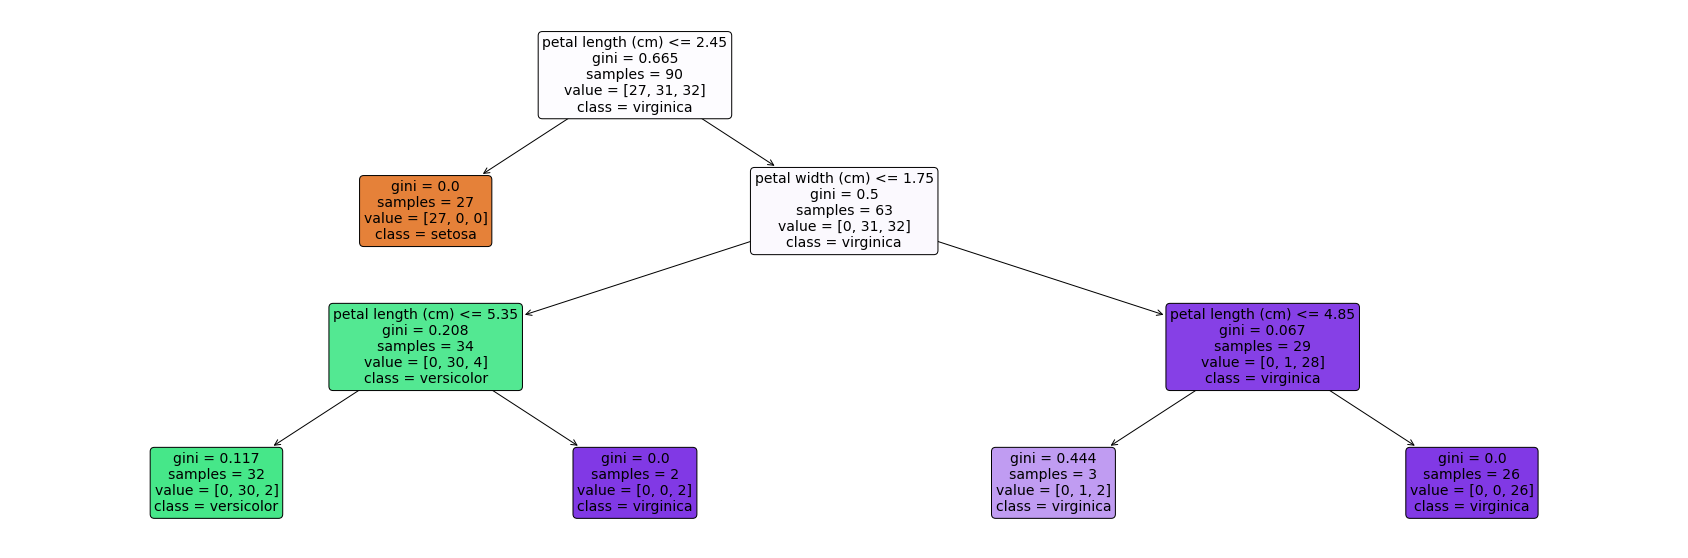

In [19]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), facecolor ='w')
#Crea la gráfica de árbol
a = tree.plot_tree(clf,
                   feature_names = feature_names,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize=14)

plt.show()

In [ ]:
from sklearn.tree import export_text
#Exporta las reglas de decisión
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
print(tree_rules)

|--- petal length (cm) <= 2.45
|   |--- class: setosa
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 5.35
|   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  5.35
|   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: virginica
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: virginica



In [20]:
test_pred_decision_tree = clf.predict(X_test)

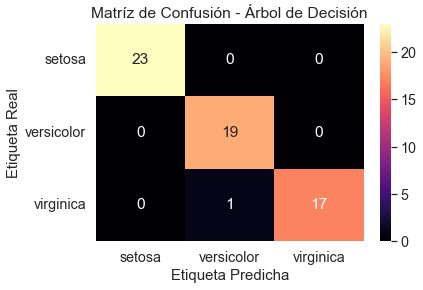

<Figure size 720x504 with 0 Axes>

In [22]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

#Obtiene la matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#Lo convierte a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#Grafíca el resultado
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Matríz de Confusión - Árbol de Decisión')
ax.set_xlabel("Etiqueta Predicha", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("Etiqueta Real", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [ ]:
#Exactitud
#Suma de la diagonal / suma de todos las celdas (Matríz de confusión)
metrics.accuracy_score(y_test, test_pred_decision_tree)

0.9833333333333333

In [23]:
#Obtiene la precisión
#Número en la diagonal / suma de la columna
precision = metrics.precision_score(y_test,
                                   test_pred_decision_tree, 
                                   average=None)
precision_results = pd.DataFrame(precision, index=labels)
precision_results.rename(columns={0:'Precisión'}, inplace =True)
precision_results

,Precisión
setosa,1.00
versicolor,0.95
virginica,1.00


In [24]:
#Recuento
#Se refiere al porcentaje de falsos positivos en la predicción
#Número en la diagonal / suma del renglón
recall = metrics.recall_score(y_test, test_pred_decision_tree, 
                              average =None)
recall_results = pd.DataFrame(recall, index= labels)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
recall_results

,Recall
setosa,1.000000
versicolor,1.000000
virginica,0.944444


In [25]:
#f1
#Media armónica de la precisión y el recuento
#2 * (precisión * recuento) / (precisión + recuento)
f1 = metrics.f1_score(y_test, test_pred_decision_tree, average=None)
f1_results = pd.DataFrame(f1, index=labels)

f1_results.rename(columns={0:'f1'}, inplace=True)
f1_results

,f1
setosa,1.000000
versicolor,0.974359
virginica,0.971429


In [26]:
#Obteniendo todas las métricas con una sola línea
#El soporte se refiere a la cantidad de ocurrencias en cada clase
print(metrics.classification_report(y_test,
                                    test_pred_decision_tree))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [10]:
#Obteniendo la importancia de cada característica
importance = pd.DataFrame({'feature': X_train.columns, 
'importance' : np.round(clf.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

             feature  importance
2  petal length (cm)       0.589
3   petal width (cm)       0.411
0  sepal length (cm)       0.000
1   sepal width (cm)       0.000


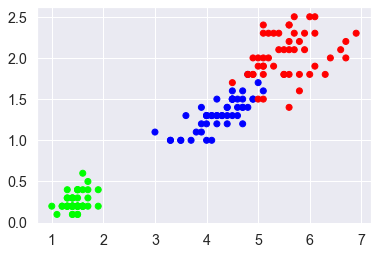

In [56]:
#Opcional
color_dict = {
    'setosa': (0,1,0),
    'versicolor': (0,0,1),
    'virginica': (1,0,0),
}

plt.scatter(df['petal length (cm)'],df['petal width (cm)'],c=list(map(lambda x:color_dict[x],df["Species"])))

In [ ]:
# Hacer un clasificador con load_wine
# Información tomada de: 
# https://towardsdatascience.com/introduction-to-decision-tree-classifiers-from-scikit-learn-32cd5d23f4d